In [1]:
# Common
import os 
import keras
import numpy as np 
import tensorflow as tf
import random

# Sound Load
import IPython.display as ipd

# Data 
from keras.preprocessing.image import ImageDataGenerator

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Image Load
from PIL import Image

# Callbacaks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model 
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers

# Function

In [2]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set(xlabel='Epoch', ylabel='Accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1].legend()
    plt.show()

In [3]:
def show_images(GRID=[5,5], model=None, size=(20,20), Data=1):
    n_rows = GRID[0]
    n_cols = GRID[1]
    n_images = n_cols * n_rows
    
    i = 1
    plt.figure(figsize=size)
    for images, labels in Data:
        id = np.random.randint(32)
        image, label = images[id], class_names[int(labels[id])]
        
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image)
        
        if model is None:
            title = f"Class : {label}"
        else:
            pred = class_names[int(np.argmax(model.predict(image[np.newaxis, ...])))]
            title = f"Org : {label}, Pred : {pred}"
        
        plt.title(title)
        plt.axis('off')
        
        i+=1
        if i>=(n_images+1):
            break
            
    plt.tight_layout()
    plt.show()

# Detect class name

In [4]:
root_path = '../input/vegetable-image-dataset/Vegetable Images/train/' 
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Class Distribution
class_dis = [len(os.listdir(root_path + name)) for name in class_names]

# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 15 
Class Names : ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [5]:
# Visualize 
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()

# Data Load

In [6]:
audio_path="../input/sound-test/Open G - B.wav"

In [7]:
input_shape = (224,224,3)
input_shape2 = (224,224)
BATCH = 32

In [8]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 370 using train_datagen generator
train_gen = train_datagen.flow_from_directory(
        root_path,  # This is the source directory for training images
        class_mode ='binary',
        target_size= input_shape2,  # All images will be resized to 200x200
        shuffle = True,
        batch_size=BATCH)

test_gen = train_datagen.flow_from_directory(
        root_path.replace('train','test'),  # This is the source directory for training images
        class_mode ='binary',
        target_size= input_shape2,  # All images will be resized to 200x200
        shuffle = True,
        batch_size=BATCH)

# Flow validation images in batches of 20 using valid_datagen generator
validation_gen = validation_datagen.flow_from_directory(
        root_path.replace('train','validation'),  # This is the source directory for training images
        class_mode ='binary',
        target_size= input_shape2,  # All images will be resized to 200x200
        shuffle = True,
        batch_size=BATCH)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
show_images(Data=train_gen)

# Model Vege Destroyer

## Model Personal Best

- Epoch = 17
- Test Acc = 0.976
- Runtime = 14 min
- Parameter = 2,883,311

In [ ]:
model1 = Sequential([])

model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(n_classes, activation='softmax'))

## Model Experiment 2nd

- Ep: 26
- t.acc:  0.966
- Para: 7,923,983
- Runtime: 29 min

In [ ]:
model1 = Sequential([])

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))

## Model 3rd
- Epoch : 21
- test acc : 0.976
- Runtime: 24 min
- Parameter: 22,8M

In [ ]:
model1 = Sequential([])

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))

## Model Experiment 4th
- 35 
- 0.984 
- 40 min 
- 4,277,935

In [ ]:
model1 = Sequential([])

model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))

## Model Experiment 5th
- 36 
- 0.985 
- 42min 
- 8,368,079

In [ ]:
model1 = Sequential([])

model1.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))

model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))

## Model Experiment 6th
- 36 
- 0.985 
- 42min 
- 8,368,079

In [32]:
model1 = Sequential([])

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(256, kernel_size=(1, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(384, kernel_size=(1, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(n_classes, activation='softmax'))

In [33]:
# Architecture
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 220, 220, 64)      36928     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 106, 106, 128)     204928    
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 104, 104, 128)     147584    
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 52, 52, 128)     

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cbs = [EarlyStopping(patience=5, restore_best_weights=True), 
       ModelCheckpoint('model.best.h5', save_best_only=True)]

In [36]:
step = 15000//BATCH
valid_step = 3000//BATCH

In [37]:
%%time
hist_1 = model1.fit(
      train_gen,
      validation_data = validation_gen,
      validation_steps = valid_step,
      callbacks = cbs,
      epochs = 100,
      steps_per_epoch = step,
      batch_size = BATCH,
      verbose = 1)

ipd.Audio(audio_path, autoplay=True)

2022-11-19 09:24:11.355942: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-19 09:24:12.783636: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


468/468 [==============================] - 92s 185ms/step - loss: 2.3592 - accuracy: 0.1423 - val_loss: 2.0781 - val_accuracy: 0.2114
Epoch 2/100
468/468 [==============================] - 80s 172ms/step - loss: 1.7826 - accuracy: 0.3413 - val_loss: 1.5113 - val_accuracy: 0.4735
Epoch 3/100
468/468 [==============================] - 80s 171ms/step - loss: 1.2273 - accuracy: 0.5569 - val_loss: 1.0727 - val_accuracy: 0.6485
Epoch 4/100
468/468 [==============================] - 80s 172ms/step - loss: 0.9285 - accuracy: 0.6855 - val_loss: 0.8032 - val_accuracy: 0.7272
Epoch 5/100
468/468 [==============================] - 80s 171ms/step - loss: 0.6962 - accuracy: 0.7737 - val_loss: 0.6991 - val_accuracy: 0.7819
Epoch 6/100
468/468 [==============================] - 89s 190ms/step - loss: 0.5337 - accuracy: 0.8304 - val_loss: 0.5409 - val_accuracy: 0.8256
Epoch 7/100
468/468 [==============================] - 94s 200ms/step - loss: 0.4176 - accuracy: 0.8697 - val_loss: 0.4040 - val_accurac

In [38]:
m_eval = model1.evaluate(test_gen)
print(m_eval)
ipd.Audio(audio_path, autoplay=True)

94/94 [==============================] - 10s 110ms/step - loss: 0.1371 - accuracy: 0.9733
[0.13712425529956818, 0.9733333587646484]


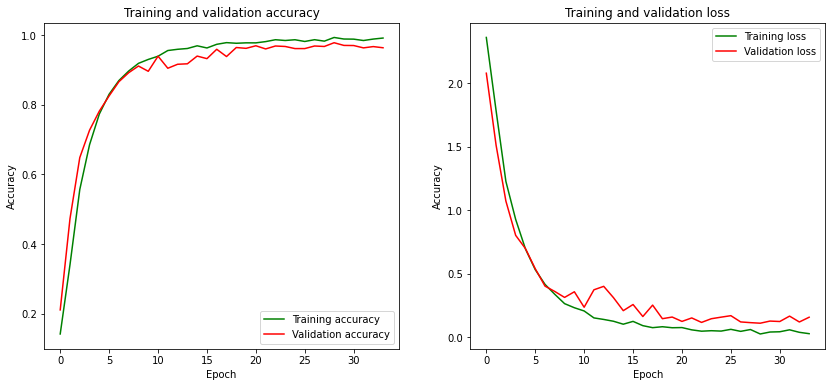

In [39]:
plot_accuracy_and_loss(hist_1)

In [40]:
hist = hist_1.history
v_acc = hist['val_accuracy'][-1]
epoch = len(hist['val_accuracy']) 
print(epoch, round(m_eval[1],3))
model1.save('Kaggle-' + str(epoch) + '-test_acc' + str(round(m_eval[1],3)) + '.h5')

34 0.973


In [ ]:
show_images(model=model1, Data=test_gen)

# Reference
- Download Kaggle : https://www.kaggle.com/general/74235#1376561
- Vegetable Datasets:
  * https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study
  * https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
- Vegetable acc 99 : https://www.kaggle.com/code/utkarshsaxenadn/vegetable-classification-resnet50v2-acc-99/notebook
- Download G. Colab : 
  * https://pangpuriye.superai.me/google-colab-zip-and-unzip-file/
  * https://predictivehacks.com/?all-tips=how-to-download-files-and-folders-from-colab 
- ResNet:
https://towardsdatascience.com/the-annotated-resnet-50-a6c536034758